In [ ]:
!pip install "dask[complete]"

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.8 MB/s eta 0:00:00


In [ ]:
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=dd.read_csv('/content/Zomato Dataset.csv', dtype={'Delivery_person_Age': 'float64'})

In [ ]:
df.head(5)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [ ]:
print(df.columns)

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)'],
      dtype='object')


In [ ]:
print(df.dtypes)

ID                             string[pyarrow]
Delivery_person_ID             string[pyarrow]
Delivery_person_Age                    float64
Delivery_person_Ratings                float64
Restaurant_latitude                    float64
Restaurant_longitude                   float64
Delivery_location_latitude             float64
Delivery_location_longitude            float64
Order_Date                     string[pyarrow]
Time_Orderd                    string[pyarrow]
Time_Order_picked              string[pyarrow]
Weather_conditions             string[pyarrow]
Road_traffic_density           string[pyarrow]
Vehicle_condition                        int64
Type_of_order                  string[pyarrow]
Type_of_vehicle                string[pyarrow]
multiple_deliveries                    float64
Festival                       string[pyarrow]
City                           string[pyarrow]
Time_taken (min)                         int64
dtype: object


In [ ]:
df.shape

(Delayed('int-57b61fe9-084e-4643-8aa0-641ebe411eb4'), 20)

In [ ]:
#checking missing values
df.isnull().sum()

Dask Series Structure:
npartitions=1
City                   int64
multiple_deliveries      ...
dtype: int64
Dask Name: to_pyarrow_string, 6 graph layers

In [ ]:
#handling missing values
df=df.dropna()

In [ ]:
avg_time_city = df.groupby("City")["Time_taken (min)"].mean()
print(avg_time_city.compute())

City
Metropolitian    27.314460
Semi-Urban       49.731707
Urban            22.983322
Name: Time_taken (min), dtype: float64


<ipython-input-10-45f5569ca28b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_time_city.index, y=avg_time_city.values, palette="viridis")


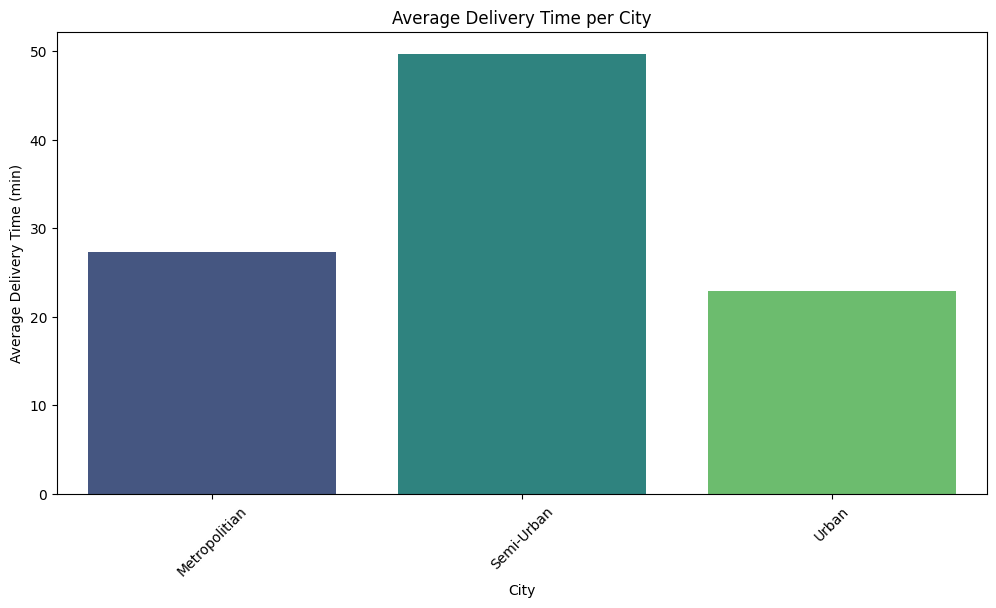

In [ ]:
#Average Delivery Time per City
avg_time_city = df.groupby("City")["Time_taken (min)"].mean().compute()

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_time_city.index, y=avg_time_city.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("City")
plt.ylabel("Average Delivery Time (min)")
plt.title("Average Delivery Time per City")
plt.show()

<ipython-input-11-4ebd25f19ad1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_impact.index, y=weather_impact.values, palette="coolwarm")


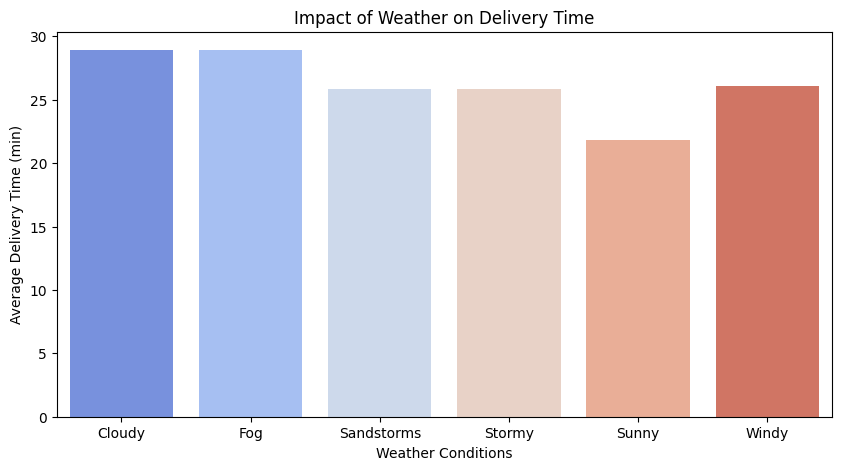

In [ ]:
#Impact of weather on delivery time
weather_impact = df.groupby("Weather_conditions")["Time_taken (min)"].mean().compute()

plt.figure(figsize=(10, 5))
sns.barplot(x=weather_impact.index, y=weather_impact.values, palette="coolwarm")
plt.xlabel("Weather Conditions")
plt.ylabel("Average Delivery Time (min)")
plt.title("Impact of Weather on Delivery Time")
plt.show()

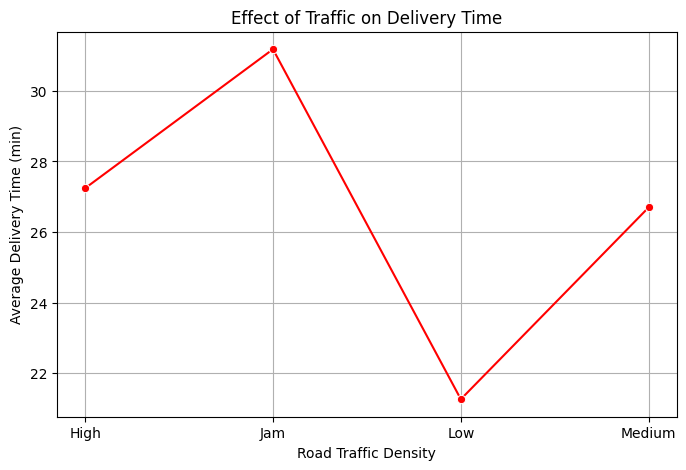

In [ ]:
#Effect of traffic on delivery time
traffic_impact = df.groupby("Road_traffic_density")["Time_taken (min)"].mean().compute()
plt.figure(figsize=(8, 5))
sns.lineplot(x=traffic_impact.index, y=traffic_impact.values, marker="o", linestyle="-", color="red")
plt.xlabel("Road Traffic Density")
plt.ylabel("Average Delivery Time (min)")
plt.title("Effect of Traffic on Delivery Time")
plt.grid(True)
plt.show()

<ipython-input-13-a1d825146456>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=festival_impact.index, y=festival_impact.values, palette="coolwarm")


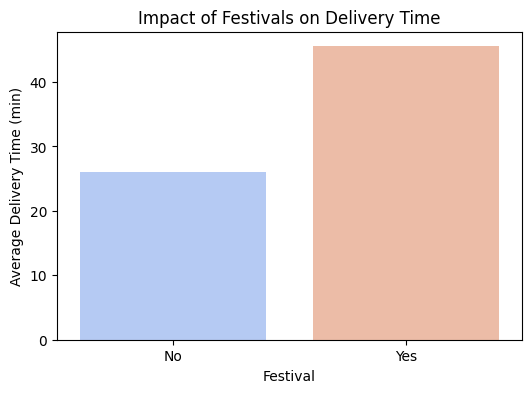

In [ ]:
#Festival vs non-festival delivery
festival_impact = df.groupby("Festival")["Time_taken (min)"].mean().compute()

plt.figure(figsize=(6, 4))
sns.barplot(x=festival_impact.index, y=festival_impact.values, palette="coolwarm")
plt.xlabel("Festival")
plt.ylabel("Average Delivery Time (min)")
plt.title("Impact of Festivals on Delivery Time")
plt.show()

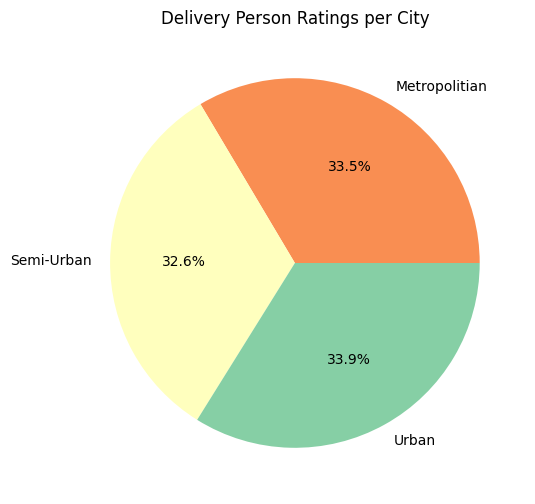

In [ ]:
#Delivery person ratings per city
delivery_ratings = df.groupby("City")["Delivery_person_Ratings"].mean().compute()
plt.figure(figsize=(10, 6))
plt.pie(delivery_ratings.values, labels=delivery_ratings.index, autopct="%1.1f%%", colors=sns.color_palette("Spectral", len(delivery_ratings)))
plt.title("Delivery Person Ratings per City")
plt.show()

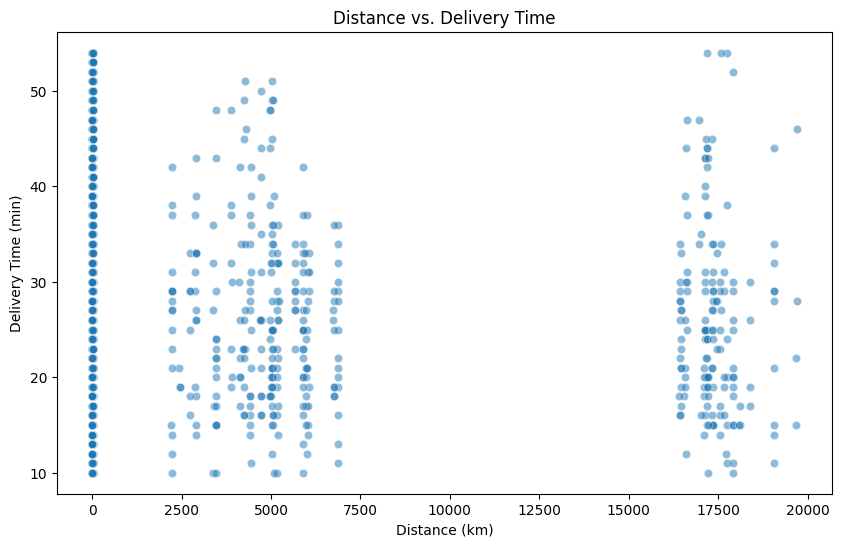

In [ ]:
#Distance vs delivery time
import numpy as np

# Function to calculate Haversine Distance
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c  # Distance in km

# Apply function using Dask
df["distance_km"] = df.map_partitions(lambda pdf: haversine(
    pdf["Restaurant_latitude"], pdf["Restaurant_longitude"],
    pdf["Delivery_location_latitude"], pdf["Delivery_location_longitude"]
))

# Compute and plot
df_scatter = df[["distance_km", "Time_taken (min)"]].compute()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_scatter["distance_km"], y=df_scatter["Time_taken (min)"], alpha=0.5)
plt.xlabel("Distance (km)")
plt.ylabel("Delivery Time (min)")
plt.title("Distance vs. Delivery Time")
plt.show()